In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score,precision_score, confusion_matrix,accuracy_score,recall_score,roc_curve,roc_auc_score,classification_report


In [75]:
df = pd.read_csv('heart.csv')
X = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [76]:
categorical_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_col:
    X[col] = encoder.fit_transform(X[col])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [77]:
for col in ['RestingBP','Cholesterol']:
    X[col] = (X[col] - X[col].min())/(X[col].max()-X[col].min())

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,0.70,0.479270,0,1,172,0,0.0,2
1,49,0,2,0.80,0.298507,0,1,156,0,1.0,1
2,37,1,1,0.65,0.469320,0,2,98,0,0.0,2
3,48,0,0,0.69,0.354892,0,1,108,1,1.5,1
4,54,1,2,0.75,0.323383,0,1,122,0,0.0,2


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [79]:
model = RandomForestClassifier(n_estimators=100)

In [80]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred = model.predict(X_test)

In [82]:
model.score(X_test, y_test)

0.8333333333333334

In [83]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  30],
       [ 16, 130]], dtype=int64)

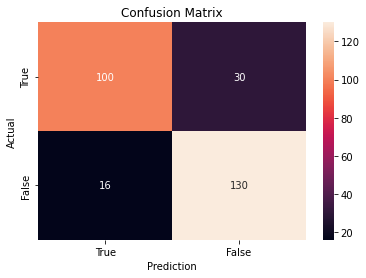

In [84]:
sns.heatmap(cm, 
            annot=True,
            fmt='.0f', 
            xticklabels=[True, False], 
            yticklabels=[True, False])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [85]:
accuracy_score(y_test,y_pred)
recall_score(y_test,y_pred)

f1_score(y_test, y_pred)

0.8496732026143791

In [86]:
precision_score(y_test, y_pred)

0.8125

In [87]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       130
           1       0.81      0.89      0.85       146

    accuracy                           0.83       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.83      0.83       276



In [88]:
fpr, tpr , thesholds = roc_curve(y_test,y_pred)
print(fpr, tpr, thesholds)

[0.         0.23076923 1.        ] [0.         0.89041096 1.        ] [2 1 0]


In [89]:
roc_auc = roc_auc_score(y_test,y_pred)

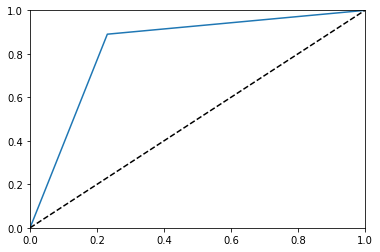

In [90]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [91]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

In [92]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8333


In [93]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8621


In [94]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7692


In [95]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7692


In [96]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1096


In [97]:
f1 = 2 * ((precision * recall)/(precision+recall))
print('F1 score: {0:0.4f}'.format(f1))

F1 score: 0.8130
